# Part I - Spaceship Titanic Data Exploration
## by Babajide Alao

## Introduction

> The Spaceship Titanic was an interstellar passenger liner launched some months ago. With over 8,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars. The dataset was downloaded from kaggle  

> This data set contains 8,693 rows with each row being an information about each passengers and 14 variables which describes the passengers. The dataset contains features like PassengerId, HomePlanet, Cabin, Destination, Transported, and many others.
  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('Spaceship Titanic.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape

(8693, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1303,1384_02,Earth,True,G/210/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Berty Mayods,False
6841,7229_01,Earth,False,F/1391/S,PSO J318.5-22,57.0,False,0.0,1.0,0.0,664.0,19.0,Gaylah Leonadorsen,False
8638,9219_02,Earth,False,F/1783/S,TRAPPIST-1e,51.0,False,6.0,0.0,0.0,0.0,1164.0,Robyna Workmanson,True
343,0379_01,Earth,False,G/63/P,TRAPPIST-1e,31.0,False,198.0,0.0,591.0,0.0,164.0,Brita Moodson,True
5829,6171_01,Earth,False,E/410/S,TRAPPIST-1e,14.0,False,5.0,0.0,479.0,297.0,9.0,Karah Rigginsen,False


##### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. So we have to split the Column into 3

In [7]:
df[['Deck', 'Number', 'Side']] = df['Cabin'].str.split('/', expand=True)

In [8]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


##### Some of the features are not needed, so we have to drop those features that are not needed in analysis 

In [9]:
df.drop(['PassengerId','Name', "Cabin", "Number"],axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [10]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Side            199
dtype: int64

##### On looking at the Features, I noticed most of the features have null values, I decided to fill the null values with the mode of each feature

In [11]:
df["HomePlanet"].fillna(df["HomePlanet"].mode()[0], inplace = True)
df["CryoSleep"].fillna(df["CryoSleep"].mode()[0], inplace = True)
df["Destination"].fillna(df["Destination"].mode()[0], inplace = True)
df["Age"].fillna(df["Age"].mode()[0], inplace = True)
df["VIP"].fillna(df["VIP"].mode()[0], inplace = True)
df["RoomService"].fillna(df["RoomService"].mode()[0], inplace = True)
df["FoodCourt"].fillna(df["FoodCourt"].mode()[0], inplace = True)
df["ShoppingMall"].fillna(df["ShoppingMall"].mode()[0], inplace = True)
df["Spa"].fillna(df["Spa"].mode()[0], inplace = True)
df["VRDeck"].fillna(df["VRDeck"].mode()[0], inplace = True)
df["Deck"].fillna(df["Deck"].mode()[0], inplace = True)
df["Side"].fillna(df["Side"].mode()[0], inplace = True)

In [12]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

### What is the structure of your dataset?

> The dataset has 8693 details about passengers with 14 features on each passenger which consists of numerical and categorical values.  

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in features that affect the probability of a passenger being Transported by checking for correlations between the Transported and other features either by visualization or analysis.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features I am looking to explore are: Age, Transported, Destination, HomePlanet, CryoSleep, Cabin(Deck and Side).

## Univariate Exploration


#### Transported

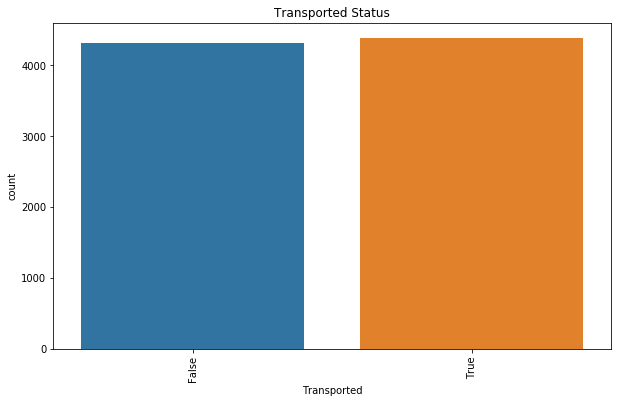

In [13]:
plt.figure(figsize = [10, 6])
plt.title('Transported Status')
plt.xticks(rotation = 90)
sb.countplot(df["Transported"]);

##### There is not a significant difference in the numbers of passengers that was transported from those that werenot trasported

#### Home Planet

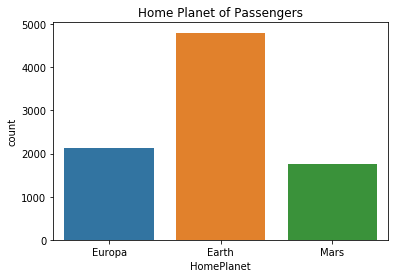

In [14]:
plt.title('Home Planet of Passengers')
sb.countplot(df["HomePlanet"]);

##### Most of the passengers in the spaceship are from Eartth

#### Cryosleep

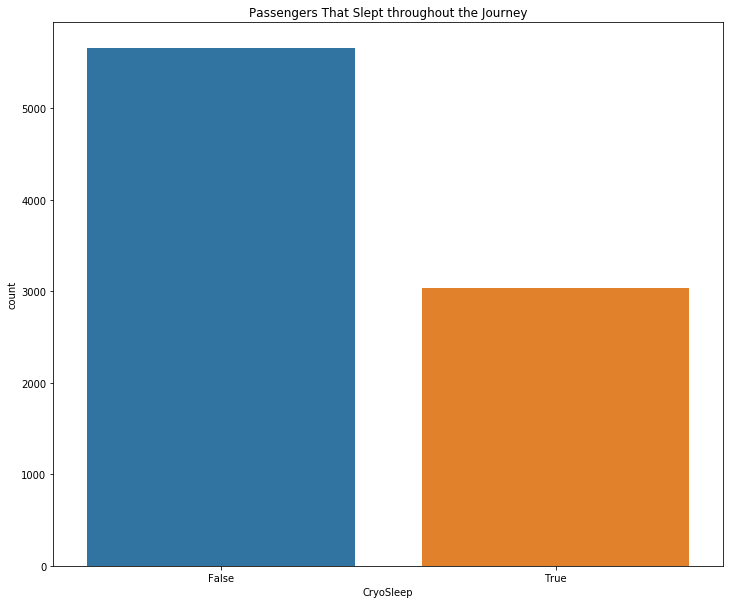

In [15]:
plt.figure(figsize = [12, 10])
plt.title('Passengers That Slept throughout the Journey')
sb.countplot(df["CryoSleep"]);

##### Most Passengers Opted to be awake throughout the course of the journey

#### Destination

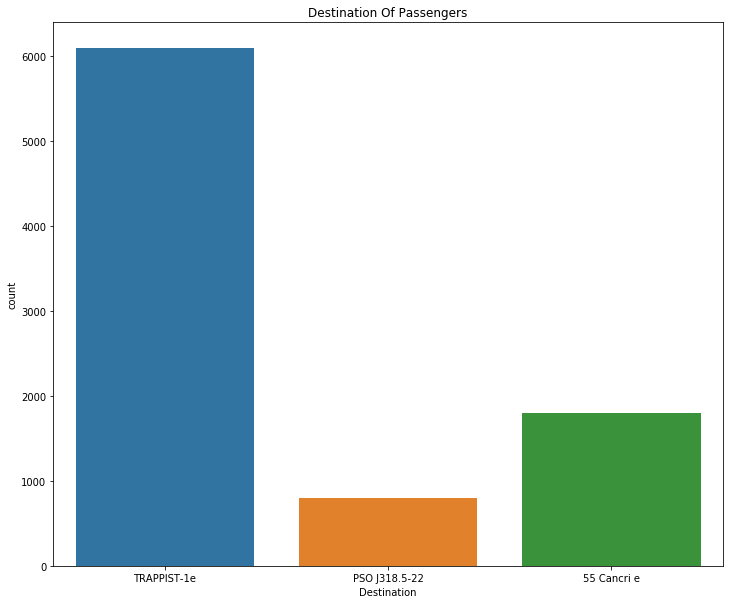

In [16]:
plt.figure(figsize = [12, 10])
plt.title('Destination Of Passengers')
sb.countplot(df["Destination"]);

##### The majority of the passenger are heading to TRAPPIST-1e

#### VIP Status

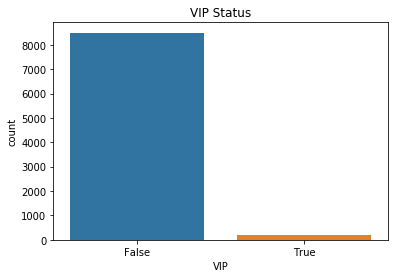

In [17]:
plt.title('VIP Status')
sb.countplot(df["VIP"]);

##### Most of the passengers didint subscribe for the VIP package during the voyage

#### Age 

(array([  591.,   649.,  2089.,  2155.,  1350.,   893.,   536.,   294.,
          106.,    30.]),
 array([  0. ,   7.9,  15.8,  23.7,  31.6,  39.5,  47.4,  55.3,  63.2,
         71.1,  79. ]),
 <a list of 10 Patch objects>)

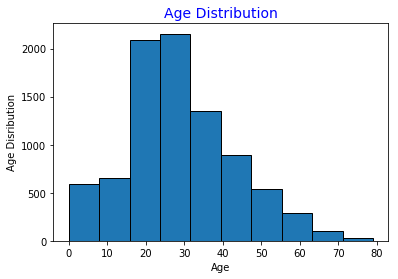

In [18]:
plt.title('Age Distribution', fontsize=14, color='blue')
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.hist(df["Age"], edgecolor='black')

#### Majority of the passengers are within the age range of 20-40 years old

#### Decck

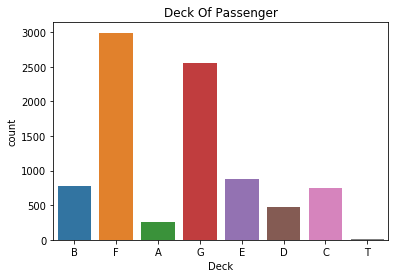

In [19]:
plt.title('Deck Of Passenger')
sb.countplot(df["Deck"]);

##### There is highest number of passengers are found in Deck F and E respectively

#### Side

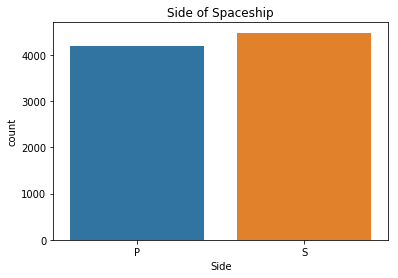

In [20]:
plt.title('Side of Spaceship')
sb.countplot(df["Side"]);

#####  The is no sgnificant difference in the numbers of passenger in the two sides of the spaceship 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the passengers are heading to TRAPPIST-1e. There were unusual points in the transported variable because it shows that a significant amount of the passengers was not transported.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Amount billed on Spa, ShoppingMall, Food Court and Room Service distribution is highly right screwed and I did not perform any operations to the data.

## Bivariate Exploration


#### Destination vs Transported

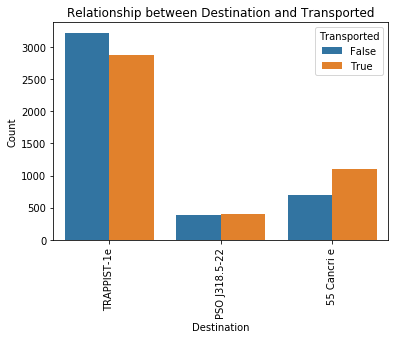

In [21]:
sb.countplot(data = df, x = 'Destination', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Relationship between Destination and Transported');

##### 55 Cancrie has more passengers that was transported against those that weren't. So i believe Passengers going to 55 Cancrie has higher probability of getting transported

#### Home Planet Vs Transported

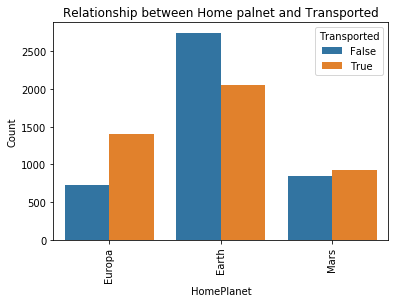

In [22]:
sb.countplot(data = df, x = 'HomePlanet', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Relationship between Home palnet and Transported');

##### Majority of the passengers from Europa Got transported to their destination

#### VIP Passengers Vs Transported

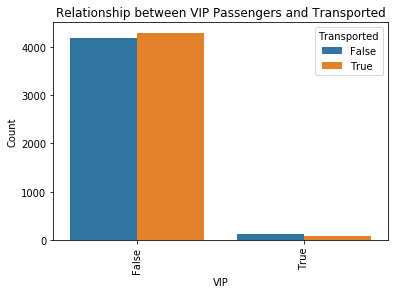

In [23]:
sb.countplot(data = df, x = 'VIP', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Relationship between VIP Passengers and Transported');

##### The graph above shows that Subscribibg for the VIP treatment does not determine if a passenger will be transported or not.

#### Age VS Transported

In [24]:
bins = [0, 21, 40, 60, 80, 120]
labels = ['0-20', '21-39', '40-59', '60-79', '80+']
df['AgeRange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

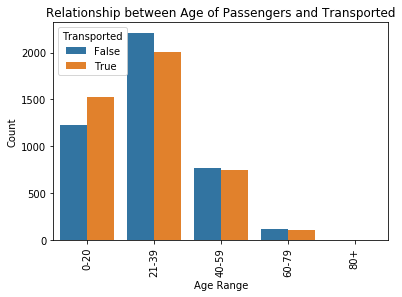

In [25]:
sb.countplot(data = df, x = 'AgeRange', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Relationship between Age of Passengers and Transported');

##### The 40-59 age range has higher probability of being transported

#### Deck  v Transported

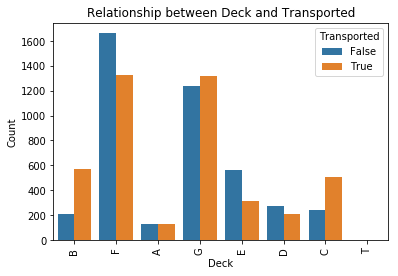

In [26]:
sb.countplot(data = df, x = 'Deck', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Relationship between Deck and Transported');

#### More passengers in Deck G was transported compared to other Decks

#### Side of Spaceship  vs Transported

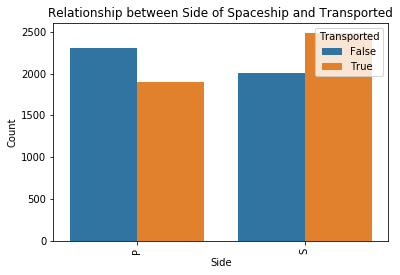

In [27]:
sb.countplot(data = df, x = 'Side', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('Side')
plt.ylabel('Count')
plt.title('Relationship between Side of Spaceship and Transported');

##### Passengers in Starboard( Side S) has a higher probability of being transported compared to Port(Side P)

#### CryoSleep  vs Transported

Text(0.5,1,'Relationship between Cryosleep and Transported')

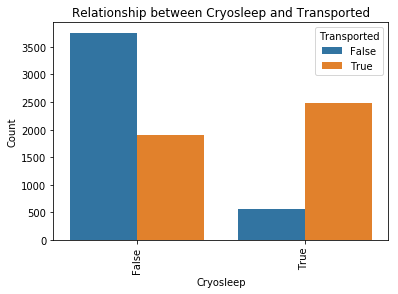

In [28]:
sb.countplot(data = df, x = 'CryoSleep', hue = 'Transported')
plt.xticks(rotation = 90)
plt.xlabel('Cryosleep')
plt.ylabel('Count')
plt.title('Relationship between Cryosleep and Transported')

##### Majority of the Passengers that opted to sleep throughout the voyage was transported

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After visualizing a few of the variables to understand the relationships beween one another other. I discverd that staying in Side s, Destination of Europa and being in tha age range of 40-59 give you a high chance of being transported

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Seeing as the Spa, RoomService, FoodCourt, ShoppingMall and VRDeck does not impact the probability of being transported or not, i decided not toperform extra exploration on these variables

## Multivariate Exploration


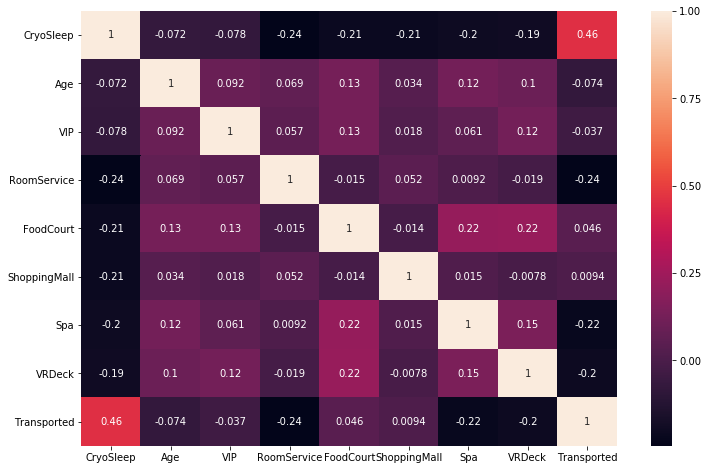

In [29]:
plt.figure(figsize = [12, 8])
sb.heatmap(df.corr(),annot = True)

##### The Cryosleep variable has the highest correlation with the Transported variable

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Cryosleep variable has the highest correlation with the Transported variable

### Were there any interesting or surprising interactions between features?

> Suprising interactions was the Spa, RoomService, FoodCourt, ShoppingMall variables. i thought passengers wthat subscribe to these packages would have a higher probability of being transported but it appears they have no relationship with the transported variable